In [1]:
#%matplotlib widget
%config InlineBackend.figure_format = 'retina'
InteractiveShell.ast_node_interactivity = 'last_expr'
from matplotlib import pyplot as plt
from matplotlib import rcParams
from scipy.optimize import curve_fit
from polutil2005ud import (D2R, SAVEPATH, dats, alpha, polr, dpolr, p0, bounds,
                           alpha_msi, polr_msi, dpolr_msi,
                           alpha_oth, polr_oth, dpolr_oth,
                           shesp, do_shesp, shesp_min, shesp_max,
                           sgbip, do_sgbip, sgbip_min, sgbip_max,
                           appsp, do_appsp, appsp_min, appsp_max
                          )
import numpy as np
import ysvisutilpy2005ud as yvu

np.random.seed(12345)
plt.style.use('default')
rcParams.update({'font.size':12})
errbfmt = dict(capsize=3, elinewidth=0.5, ls='', ms=4, marker='o')

In [2]:
# We need to do it in a separate cell. See:
# https://github.com/jupyter/notebook/issues/3385
plt.style.use('default')
rcParams.update({'font.size':12})
rcParams.update({'mathtext.fontset':'dejavuserif'})

def minmaxline(ax, l, h=p0['shesp'][0], a0=p0['shesp'][1], k1=p0['shesp'][2], k2=p0['shesp'][3], k0=p0['shesp'][4]):
    amin, pmin = shesp_min(np.linspace(0, 20), h=h, a0=a0, k1=k1, k2=k2, k0=k0)
    amax, pmax = shesp_max(np.linspace(30, 140), h=h, a0=a0, k1=k1, k2=k2, k0=k0)
    for aa, pp in zip([amin, amax], [pmin, pmax]):
        ax.plot(aa, pp, marker='o', ms=5, color=l[0].get_color(), alpha=0.7)
        ax.plot((aa, aa), (0, pp), color=l[0].get_color(), alpha=0.3, ls='--', lw=1)

xx = np.arange(0, 180, 0.1)

In [60]:
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

axh = axs[0, 0]
axi = axs[0, 1]
ax1 = axs[1, 0]
ax2 = axs[2, 0]
ax0 = axs[2, 1]
label_titles = [
    r'$ h [\%/^\circ] $',
    r'$ \alpha_0 [^\circ] $',
    r'$ k_1 [1/^\circ] $',
    r'$ k_2 [1/^\circ] $',
    r'$ k_0 [1/^\circ] $',
]
linekw = dict(lw=1)

print("Default h, a0, k1, k2, k0 =", p0['shesp'])

for h in np.arange(0.025, 0.2, 0.025):
    l = axh.plot(xx, shesp(xx, h=h), label=r'${:.3f}$'.format(h), **linekw)
    minmaxline(axh, l, h=h)
    
for a0 in np.arange(15, 26, 2.5):
    l = axi.plot(xx, shesp(xx, a0=a0), label=r'${:.1f}$'.format(a0), **linekw)
    minmaxline(axi, l, a0=a0)

for k1 in [-0.02, 1.e-5, 1.e-3, 0.01, 0.05, 0.10, 0.50, 1.0]:
    l = ax1.plot(xx, shesp(xx, k1=k1), label=r'${:.5f}$'.format(k1), **linekw)
    minmaxline(ax1, l, k1=k1)

for k2 in [-0.02, 1.e-5, 1.e-3, 0.01, 0.02, 0.05, 0.10, 0.15]:
    l = ax2.plot(xx, shesp(xx, k2=k2), label=r'${:.5f}$'.format(k2), **linekw)
    minmaxline(ax2, l, k2=k2)

for k0 in [-0.02, 1.e-5, 1.e-3, 0.01, 0.02, 0.05, 0.10, 0.15]:
    l = ax0.plot(xx, shesp(xx, k0=k0), label=r'${:.5f}$'.format(k0), **linekw)
    minmaxline(ax0, l, k0=k0)
    
for ax, lab in zip([axh, axi, ax1, ax2, ax0], label_titles):
    ax.legend(loc=2, fontsize=10, title=lab, title_fontsize=10)
    ax.axhline(0, color='k', lw=1)
    ax.set(xlabel='Phase angle α [˚]', ylabel=r"$P_\mathrm{r} [\%]$", ylim=(-5, 35))

yvu.linticker(axs)
axs[1, 1].remove()
plt.tight_layout()
plt.show();

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Default h, a0, k1, k2, k0 = (0.1, 20, 0.001, 1e-05, 1e-05)


In [44]:
fig, axs = plt.subplots(3, 2, figsize=(10, 12))

axh = axs[0, 0]
axi = axs[0, 1]
ax1 = axs[1, 0]
ax2 = axs[2, 0]
ax0 = axs[2, 1]
label_titles = [
    r'$ h [\%/^\circ] $',
    r'$ \alpha_0 [^\circ] $',
    r'$ k_1 [1/^\circ] $',
    r'$ k_2 [1/^\circ] $',
    r'$ k_0 [1/^\circ] $',
]
linekw = dict(lw=1)

print("Default h, a0, k1, k2, k0 =", p0['shesp'])

for h in np.arange(0.025, 0.2, 0.025):
    l = axh.plot(xx, shesp(xx, h=h), label=r'${:.3f}$'.format(h), **linekw)
    minmaxline(axh, l, h=h)
    
for a0 in np.arange(15, 26, 2.5):
    l = axi.plot(xx, shesp(xx, a0=a0), label=r'${:.0f}$'.format(a0), **linekw)
    minmaxline(axi, l, a0=a0)

for k1 in [-0.02, 1.e-5, 1.e-3, 0.01, 0.05, 0.10, 0.50, 1.0]:
    l = ax1.plot(xx, shesp(xx, k1=k1), label=r'${:.5f}$'.format(k1), **linekw)
    minmaxline(ax1, l, k1=k1)

for k2 in [-0.02, 1.e-5, 1.e-3, 0.01, 0.02, 0.05, 0.10, 0.15]:
    l = ax2.plot(xx, shesp(xx, k2=k2), label=r'${:.5f}$'.format(k2), **linekw)
    minmaxline(ax2, l, k2=k2)

for k0 in [-0.02, 1.e-5, 1.e-3, 0.01, 0.02, 0.05, 0.10, 0.15]:
    l = ax0.plot(xx, shesp(xx, k0=k0), label=r'${:.5f}$'.format(k0), **linekw)
    minmaxline(ax0, l, k0=k0)
    
for ax, lab in zip([axh, axi, ax1, ax2, ax0], label_titles):
    ax.legend(loc=4, fontsize=10, title=lab, title_fontsize=10)
    ax.axhline(0, color='k', lw=1)
    ax.set(xlabel='Phase angle α [˚]', ylabel=r"$P_\mathrm{r} [\%]$", ylim=(-3, 2), xlim=(0, 35))

yvu.linticker(axs)
axs[1, 1].remove()

plt.tight_layout()
plt.show();

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Default h, a0, k1, k2, k0 = (0.1, 20, 0.001, 1e-05, 1e-05)


In [61]:
fig, axs = plt.subplots(1, 1, figsize=(8, 5), sharex=False, sharey=False, gridspec_kw=None)

h = 0.1
a0 = 20
k1 = 0.01
k2 = 1.e-6
k0 = 1.e-6
    
term1 = (1 - np.exp(-k1*xx))/(1 - np.exp(-k1*a0))
term2 = h*(1 - np.exp(-k0*(xx - a0)))/k0
term3 = (1 - np.exp(-k2*(xx - 180)))/(1 - np.exp(-k2*(a0 - 180)))
# No D2R needed for h because term1*term2*term3 has unit of [deg] so h is already %/deg.
Pr = term1*term2*term3

axs.plot(xx, term1, ls='--', label=r'$\frac{1 - e^{-k_1 \alpha}}{1 - e^{-k_1 \alpha_0}}$')
axs.plot(xx, term2, ls='--', label=r'$h \frac{1 - e^{-k_0 (\alpha - \alpha_0)}}{k_0}$')
axs.plot(xx, term3, ls='--', label=r'$\frac{1 - e^{-k_2 (\alpha - 180^\circ)}}{1 - e^{-k_2 (\alpha_0 - 180^\circ)}}$')
axs.plot(xx, Pr, 'r-', label=r"$P_\mathrm{r}$")
axs.set(xlabel='Phase angle α [˚]', ylabel=r"$P_\mathrm{r} [\%]$")

axs.axhline(0, color='k', lw=1)
yvu.linticker(axs)
axs.legend(fontsize=18, ncol=1)
axs.set(ylim=(-5, 20))

plt.tight_layout()
plt.show();

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [47]:
%matplotlib widget
from ipywidgets import interact, widgets

def shesp_decomp(x, h=p0['shesp'][0], a0=p0['shesp'][1], k1=p0['shesp'][2], k2=p0['shesp'][3],
                 k0=p0['shesp'][4]):
    term0 = h*(1 - np.exp(-k0*(x - a0)))/k0
    term1 = (1 - np.exp(-k1*x))/(1 - np.exp(-k1*a0))
    term2 = (1 - np.exp(-k2*(x - 180)))/(1 - np.exp(-k2*(a0 - 180)))
    # No D2R needed for h because term1*term2*term3 has unit of [deg] so h is already %/deg.
    Pr = term0*term1*term2
    return term0, term1, term2, Pr

t0, t1, t2, pol = shesp_decomp(xx)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
yvu.linticker(ax)
ax.set(xlabel='Phase angle α [˚]', ylabel=r"$P_\mathrm{r} [\%]$", ylim=(-5, 100))

l0, = ax.plot(xx, t0, ls='--', lw=1, label=r'$h \frac{1 - e^{-k_0 (\alpha - \alpha_0)}}{k_0}$')
l1, = ax.plot(xx, t1, ls='--', lw=1, label=r'$\frac{1 - e^{-k_1 \alpha}}{1 - e^{-k_1 \alpha_0}}$')
l2, = ax.plot(xx, t2, ls='--', lw=1, label=r'$\frac{1 - e^{-k_2 (\alpha - 180^\circ)}}{1 - e^{-k_2 (\alpha_0 - 180^\circ)}}$')
lp, = ax.plot(xx, pol, 'r-', lw=2, label=r"$P_\mathrm{r}$")
ax.legend(loc=2, fontsize=15)

def shesp_pyplot(h, a0, k1, k2, k0):
    ''' Shestopalov function in pure python mode.
    '''
    t0, t1, t2, pol = shesp_decomp(xx, h=h, a0=a0, k1=k1, k2=k2, k0=k0)
    l0.set_ydata(t0)
    l1.set_ydata(t1)
    l2.set_ydata(t2)
    lp.set_ydata(pol)
    fig.canvas.draw_idle()

interact(
    shesp_pyplot, 
    h=widgets.FloatSlider(min=0, max=0.5, step=0.02, value=p0['shesp'][0]),
    a0=widgets.FloatSlider(min=10, max=30, step=0.5, value=p0['shesp'][1]),
    k1=widgets.FloatSlider(min=-0.5, max=0.5, step=0.001, value=p0['shesp'][2]),
    k2=widgets.FloatSlider(min=-0.1, max=0.1, step=0.001, value=p0['shesp'][3]),
    k0=widgets.FloatSlider(min=-0.1, max=0.1, step=0.001, value=p0['shesp'][4])
);

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(FloatSlider(value=0.1, description='h', max=0.5, step=0.02), FloatSlider(value=20.0, des…

In [66]:
%matplotlib widget
from ipywidgets import interact, widgets

def shesp_decomp(x, h=p0['shesp'][0], a0=p0['shesp'][1], k1=p0['shesp'][2], k2=p0['shesp'][3],
                 k0=p0['shesp'][4]):
    term0 = h*(x-a0)*(x-180)/(a0-180)
    term1 = (1 - np.exp(-k1*x))/(1 - np.exp(-k1*a0))
    term2 = np.exp(k2*(x-a0))
#     term2 = (1 - np.exp(-k2*(x - 180)))/(1 - np.exp(-k2*(a0 - 180)))
    # No D2R needed for h because term1*term2*term3 has unit of [deg] so h is already %/deg.
    Pr = term0*term1*term2
    return term0, term1, term2, Pr

t0, t1, t2, pol = shesp_decomp(xx)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
yvu.linticker(ax)
ax.set(xlabel='Phase angle α [˚]', ylabel=r"$P_\mathrm{r} [\%]$", ylim=(-5, 100))

l0, = ax.plot(xx, t0, ls='--', lw=1, label=r'$h \frac{1 - e^{-k_0 (\alpha - \alpha_0)}}{k_0}$')
l1, = ax.plot(xx, t1, ls='--', lw=1, label=r'$\frac{1 - e^{-k_1 \alpha}}{1 - e^{-k_1 \alpha_0}}$')
l2, = ax.plot(xx, t2, ls='--', lw=1, label=r'$\frac{1 - e^{-k_2 (\alpha - 180^\circ)}}{1 - e^{-k_2 (\alpha_0 - 180^\circ)}}$')
lp, = ax.plot(xx, pol, 'r-', lw=2, label=r"$P_\mathrm{r}$")
ax.legend(loc=2, fontsize=15)

def shesp_pyplot(h, a0, k1, k2, k0):
    ''' Shestopalov function in pure python mode.
    '''
    t0, t1, t2, pol = shesp_decomp(xx, h=h, a0=a0, k1=k1, k2=k2, k0=k0)
    l0.set_ydata(t0)
    l1.set_ydata(t1)
    l2.set_ydata(t2)
    lp.set_ydata(pol)
    fig.canvas.draw_idle()

interact(
    shesp_pyplot, 
    h=widgets.FloatSlider(min=0, max=0.5, step=0.02, value=p0['shesp'][0]),
    a0=widgets.FloatSlider(min=10, max=30, step=0.5, value=p0['shesp'][1]),
    k1=widgets.FloatSlider(min=-0.5, max=0.5, step=0.001, value=p0['shesp'][2]),
    k2=widgets.FloatSlider(min=-0.1, max=0.1, step=0.001, value=p0['shesp'][3]),
    k0=widgets.FloatSlider(min=-0.1, max=0.1, step=0.001, value=p0['shesp'][4])
);

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(FloatSlider(value=0.1, description='h', max=0.5, step=0.02), FloatSlider(value=20.0, des…

[ 6.91544634e-04  1.95325419e+01 -3.49672709e-02  9.99993917e+01]


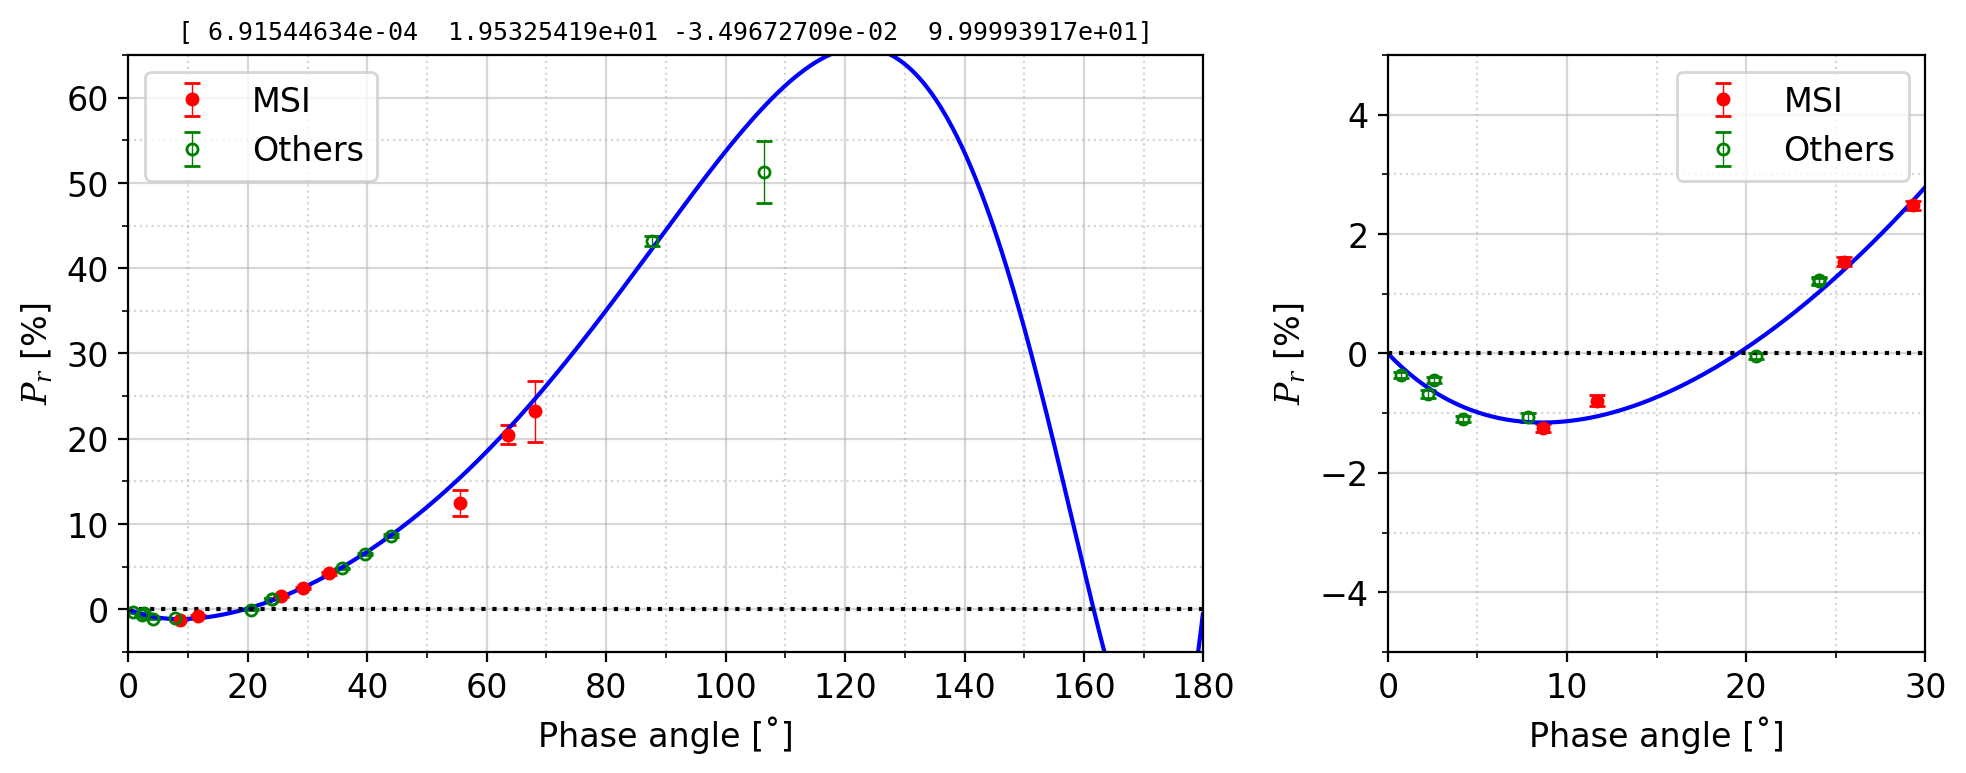

In [79]:
import polutil2005ud as util

def testp(x, h=0.1, a0=20, k1=1.e-5, k2=0):
    ''' Shestopalov function in pure python mode.
    '''
    term0 = h*(x - a0)*(x - 180)/(a0 - 180)
    term1 = (1 - np.exp(-k1*x))/(1 - np.exp(-k1*a0))
#     term1 = (np.exp(k1*(x+a0)) - 1)/(np.exp(k1*(2*a0)) - 1)
#     term2 = 1 + np.exp(-(x-a0)**2*k2)
#     term2 = 1
#     term2 = (1 + np.exp(-k2*x))/(1 + np.exp(-k2*a0))
    term2 = 1 + k2*np.tan(np.deg2rad(180-x-a0)/2)
    Pr = term0*term1*term2
    return Pr

xx = np.arange(0.1, 180, 0.1)
fitfunc = testp
n_param = 4
pars = util.pars_sgbip
p0 = [0.2, 20, 1.e-5, 1.e-5]
bounds = (
    (0.0, 10, -100, 0),
    (1.0, 30, +100, 100)
)
cfit_kw = dict(p0=p0, absolute_sigma=False, bounds=bounds)

sl = slice(None, None, None)
popt, pcov = curve_fit(fitfunc, alpha[sl], polr[sl], sigma=dpolr[sl], maxfev=10000, **cfit_kw)
# popt, pcov = curve_fit(fitfunc, alpha_oth, polr_oth, sigma=dpolr_oth,  **cfit_kw)
print(popt)

plt.close()
fig, axs = plt.subplots(1, 2, figsize=(10, 4), sharex=False, sharey=False, gridspec_kw={'width_ratios':[2, 1]})
# ax1 = axs
ax1, ax2 = axs

ax1.set_title(popt, fontsize=9, fontfamily='monospace')
for ax in axs.tolist():
    ax.errorbar(alpha_msi, polr_msi, dpolr_msi, color='r', **errbfmt, label="MSI")
    ax.errorbar(alpha_oth, polr_oth, dpolr_oth, color='g', mfc='none', **errbfmt, label="Others")
    ax.plot(xx, fitfunc(xx, *popt), 'b-')
    ax.axhline(0, color='k', ls=':')
    ax.legend()
    ax.set(xlabel="Phase angle [˚]", ylabel=r"$ P_r $ [%]")

# popt_msi, _ = curve_fit(fitfunc, alpha_msi, polr_msi, sigma=dpolr_msi, **cfit_kw)
# popt_oth, _ = curve_fit(fitfunc, alpha_oth, polr_oth, sigma=dpolr_oth, **cfit_kw)
# ax1.plot(xx, fitfunc(xx, *popt_msi), 'r:')
# ax1.plot(xx, fitfunc(xx, *popt_oth), 'g--')

# ax2.errorbar(alpha_msi, polr_msi - fitfunc(alpha_msi, *popt), dpolr_msi, color='r', **errbfmt, label="MSI")
# ax2.errorbar(alpha_oth, polr_oth - fitfunc(alpha_oth, *popt), dpolr_oth, color='g', mfc='none', **errbfmt, label="Others")

yvu.linticker(axs, xmajlockws=[20, 10], xminlockws=[10, 5], ymajlockws=[10, 2], yminlockws=[5, 1])
ax1.set_xlim(0, 180)
ax1.set_ylim(-5, 65)
ax2.set_xlim(0, 30)
ax2.set_ylim(-5, 5)

fig.tight_layout()

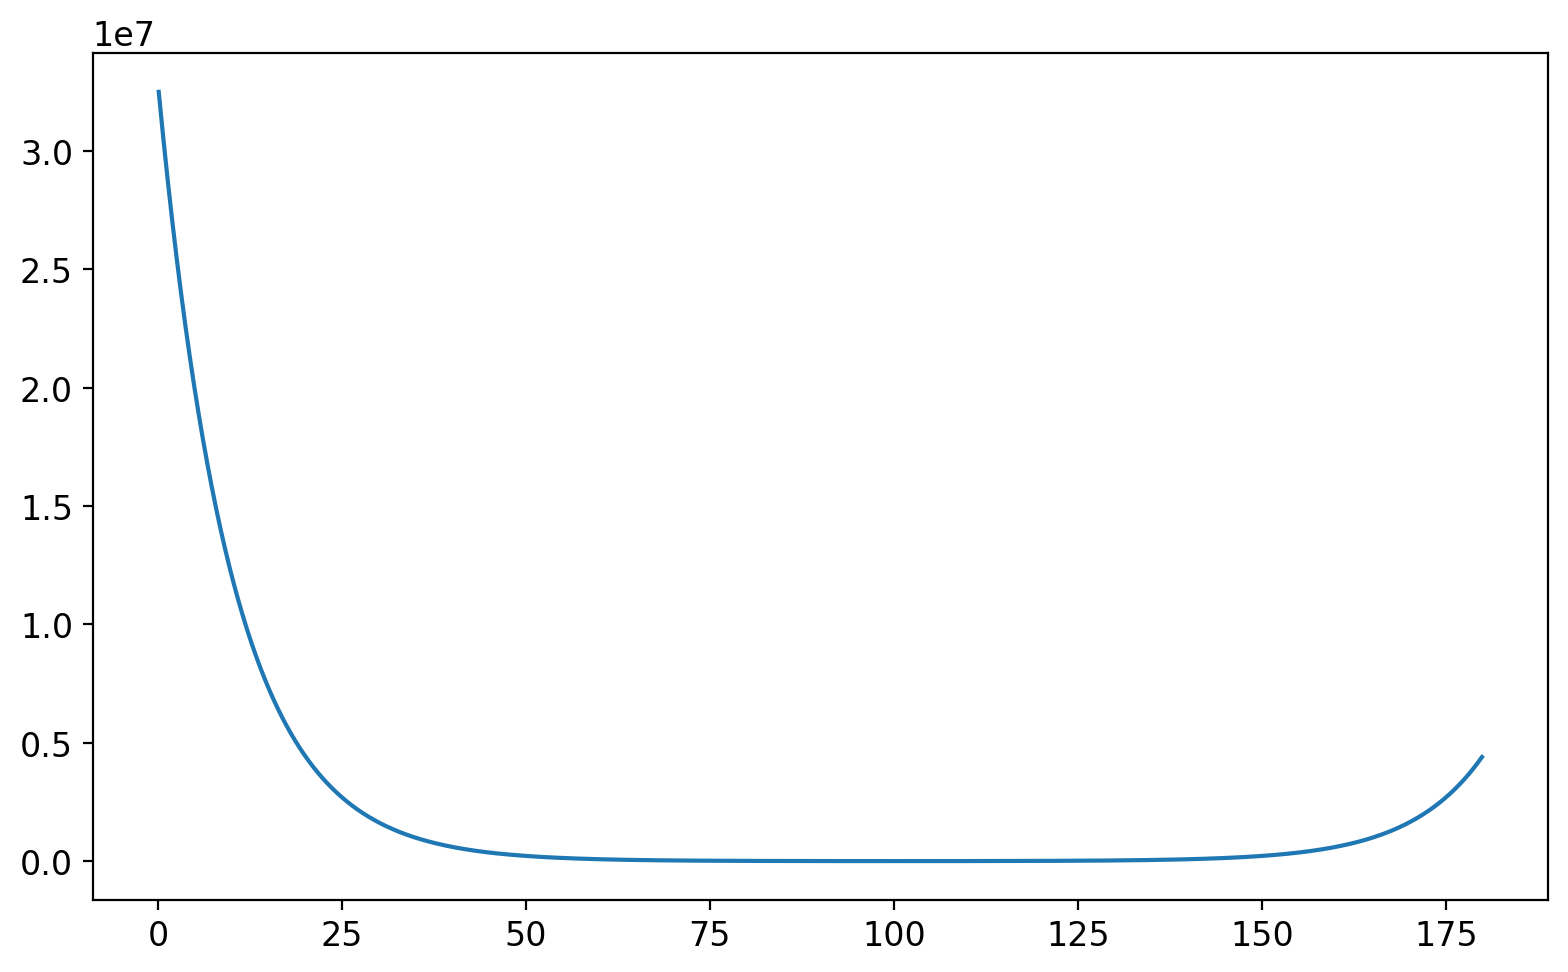

In [32]:
fig, axs = plt.subplots(1, 1, figsize=(8, 5), sharex=False, sharey=False, gridspec_kw=None)

#axs[0].
axs.plot(
    xx, 
    -np.cosh((xx)/1000) + np.cosh((xx-20)/10) + np.cosh((xx-180)/10)
)
plt.tight_layout()
plt.show();